<a href="https://colab.research.google.com/github/appliedcode/mthree-c422/blob/mthree-c422-Shivam/ETL_assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"

# Load the dataset using ";" as separator
df = pd.read_csv(url, sep=';')

df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [29]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Rename columns for better readability
df.columns = [col.strip().replace(" ", "_").lower() for col in df.columns]

# Check data types and descriptive stats
df.info()
df.describe()


Missing values:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   ph                    1599 non-null 

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [30]:
# Add a new column for quality classification
df['quality_label'] = df['quality'].apply(lambda x: 'High Quality' if x >= 7 else 'Low/Medium Quality')

df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,quality_label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Low/Medium Quality
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,Low/Medium Quality
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,Low/Medium Quality
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,Low/Medium Quality
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Low/Medium Quality


In [31]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.drop(['quality'])

# Normalize features
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


In [32]:
df['total_acidity'] = df['fixed_acidity'] + df['volatile_acidity']

df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,quality_label,total_acidity
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,5,Low/Medium Quality,0.645048
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,5,Low/Medium Quality,0.803734
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,5,Low/Medium Quality,0.721542
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,6,Low/Medium Quality,0.693660
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,5,Low/Medium Quality,0.645048


In [33]:
import sqlite3

# Create SQLite connection
conn = sqlite3.connect("wine_quality.db")

# Store DataFrame into SQLite
df.to_sql("wine_data", conn, if_exists="replace", index=False)


1599

In [34]:
query1 = """
SELECT quality_label, COUNT(*) as count
FROM wine_data
GROUP BY quality_label;
"""
pd.read_sql(query1, conn)


,quality_label,count
0,High Quality,217
1,Low/Medium Quality,1382


In [35]:
query2 = """
SELECT quality_label, ROUND(AVG(alcohol), 3) as avg_alcohol
FROM wine_data
GROUP BY quality_label;
"""
pd.read_sql(query2, conn)


,quality_label,avg_alcohol
0,High Quality,0.480
1,Low/Medium Quality,0.285


In [36]:
query3 = """
SELECT *
FROM wine_data
ORDER BY alcohol DESC
LIMIT 5;
"""
pd.read_sql(query3, conn)


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,quality_label,total_acidity
0,1.000000,0.164384,0.65,0.452055,0.140234,0.295775,0.229682,0.552863,0.188976,0.305389,1.000000,5,Low/Medium Quality,1.164384
1,0.053097,0.150685,0.00,0.061644,0.063439,0.366197,0.201413,0.112335,0.740157,0.275449,0.861538,6,Low/Medium Quality,0.203782
2,0.053097,0.150685,0.00,0.061644,0.063439,0.366197,0.201413,0.112335,0.740157,0.275449,0.861538,6,Low/Medium Quality,0.203782
3,0.371681,0.232877,0.45,0.116438,0.088481,0.084507,0.042403,0.339941,0.456693,0.275449,0.861538,6,Low/Medium Quality,0.604558
4,0.035398,0.205479,0.24,0.075342,0.080134,0.253521,0.155477,0.119677,0.771654,0.245509,0.861538,8,High Quality,0.240878


In [37]:
total = len(df)
high_quality = len(df[df['quality_label'] == 'High Quality'])
percentage = (high_quality / total) * 100
print(f"High quality wine percentage: {percentage:.2f}%")


High quality wine percentage: 13.57%


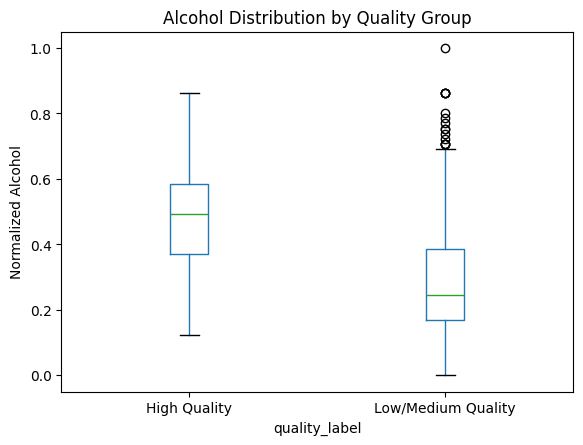

In [39]:
import matplotlib.pyplot as plt

df.boxplot(column='alcohol', by='quality_label', grid=False)
plt.title('Alcohol Distribution by Quality Group')
plt.suptitle('')
plt.ylabel('Normalized Alcohol')
plt.show()


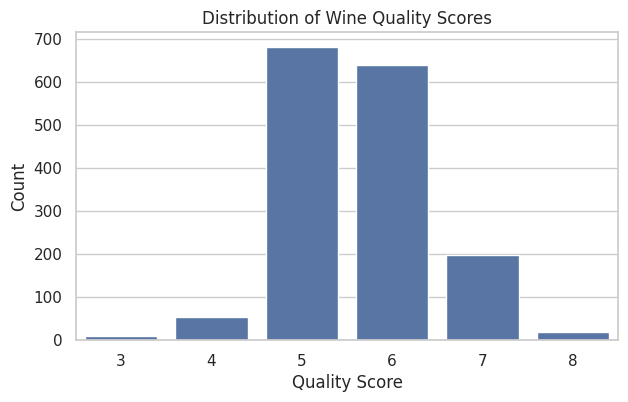

In [41]:
import seaborn as sns
sns.set(style="whitegrid")
plt.figure(figsize=(7, 4))
sns.countplot(data=df, x='quality')
plt.title('Distribution of Wine Quality Scores')
plt.xlabel('Quality Score')
plt.ylabel('Count')
plt.show()

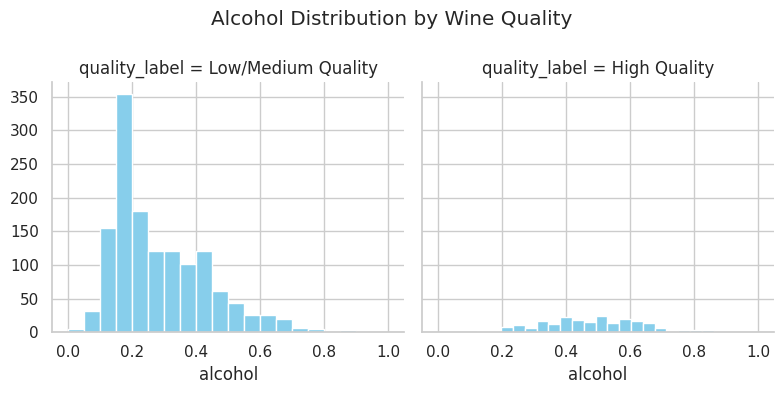

In [42]:
g = sns.FacetGrid(df, col="quality_label", height=4, aspect=1)
g.map(plt.hist, "alcohol", bins=20, color='skyblue')
g.fig.subplots_adjust(top=0.8)
g.fig.suptitle("Alcohol Distribution by Wine Quality")
plt.show()